# Feature selection (simple)

Download the fruits data [here](https://drive.google.com/file/d/1M8tiAWDZclABJN1Meq9oEHCLJTNyHdpP/view?usp=share_link)

In [8]:
!pip3 install pandas

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 12.6 MB 269 kB/s eta 0:00:01
     |████████████████████████████████| 345 kB 431 kB/s eta 0:00:01
     |████████████████████████████████| 505 kB 560 kB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [10]:
!pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 288 kB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:

df = pd.read_csv('/Users/brahianmichelgiraldoguisao/Documents/Grupo EBD/machine_learning/Sem_08/fruits_data_ext.csv')

In [4]:
X, y = [data.iloc[:, 5:7],data['fruit_label']]
print(X.shape,y.shape)

(177, 2) (177,)


In [6]:
random_columns = np.random.permutation(22)
print (random_columns)

[ 3  2  5 10 11  8 19 16  1 12 15  7 21 20 13  6  0 17  9  4 18 14]


In [12]:
## Add some noisy data to degrade features
random_features = np.random.RandomState(1000).uniform(0, 0.5, size=(X.shape[0], 20))
X = np.hstack((X, random_features))
X = X[:, random_columns]

print (X.shape, y.shape)

(177, 22) (177,)


In [13]:
# Normalize data to 0-1
X = MinMaxScaler(feature_range=(0,1)).fit_transform(X)

# Split dataset to select feature and evaluate the classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print ("\n", random_columns, "\n", np.arange(22))

(132, 22) (45, 22) (132,) (45,)

 [ 3  2  5 10 11  8 19 16  1 12 15  7 21 20 13  6  0 17  9  4 18 14] 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


## Classification using SVC

In [14]:
# Train a classifier using SVC on train data
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

SVC(kernel='linear')

Accuracy:0.6444444444444445 


<Axes: >

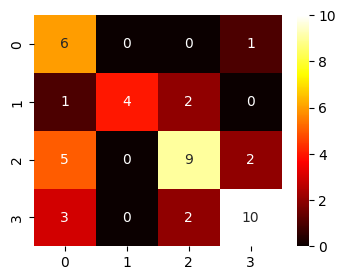

In [17]:
# Take predictions and compute some metrics (acc and CM)
predictions = classifier.predict(X_test)

acc_b = accuracy_score(y_test, predictions)
cm_b = confusion_matrix(y_test, predictions)

print ("Accuracy:{0} ".format(acc_b))
_, ax = plt.subplots(figsize=(4,3))
sns.heatmap(cm_b, cmap='hot' ,annot=True, ax=ax)

## Use Recursive Feature Elimination

### RFE -> [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE)


In [18]:
from sklearn.feature_selection import RFE

# Create a new SVC classifier 
clf = SVC(kernel='linear')

# Compute RFE
rfe = RFE( estimator = clf , n_features_to_select = 12 )

best_features = rfe.fit( X_train , y_train )


In [22]:
# See results
print("Num Features: %d" % best_features.n_features_)
print("Selected Features: %s" % best_features.ranking_)
print("                 : %s" % np.arange(22))

Num Features: 12
Selected Features: [ 2  7  4 10  1 11  1  9  1  1  1  1  6  1  5  1  1  1  1  8  1  3]
                 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


In [23]:
list_best = np.where(best_features.ranking_ == 1)[0].tolist()
print (list_best)

[4, 6, 8, 9, 10, 11, 13, 15, 16, 17, 18, 20]


In [24]:
# Select best features
best_train = X_train[:, list_best] 
best_test  = X_test[:, list_best]

print(best_train.shape, best_test.shape)

(132, 12) (45, 12)


In [25]:
# Retrain classifier on best features and make predictions
clf = SVC(kernel='linear')
clf.fit(best_train, y_train)

SVC(kernel='linear')

For Recursive feature elimination
acc before: 0.6444444444444445, after: 0.6666666666666666


<Axes: >

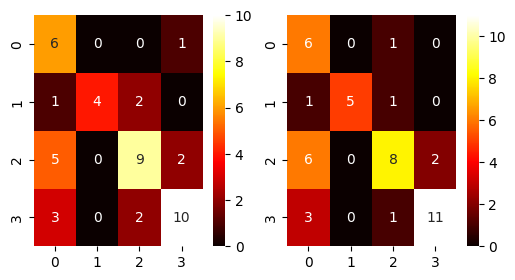

In [29]:
# Compute metrics
predictions = clf.predict(best_test)
acc_best = accuracy_score(y_test, predictions)
cm_best  = confusion_matrix(y_test, predictions)

print("For Recursive feature elimination")
print ('acc before: {0}, after: {1}'.format(acc_b, acc_best))
       
_, axes = plt.subplots(1,2,figsize=(6,3))
sns.heatmap(cm_b, annot=True, cmap='hot' , ax=axes[0])
sns.heatmap(cm_best, annot=True, cmap='hot' , ax=axes[1])



## Use univariate selection to determine best features


### SelectKBest -> [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)

Metrics: [F_classif (ANOVA)](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif), [Chi2](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2), [mutual_information](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2 #ANOVA

skb = SelectKBest( _ , k = _ )
skb.fit( _ , _ )

best_train = _
best_test = _

print (best_train.shape)

(112, 2)


In [ ]:
print("Num Features: %d" % best_train.shape[0])
print("Selected Features: %s" % np.array(skb.get_support(),dtype=int).tolist())
print("                 : %s" % np.arange(22))

In [ ]:
# Retrain classifier on best features and make predictions



In [ ]:
# Compute metrics
acc_best = 
cm_best  =

print("For Recursive feature elimination")



### SelectPercentile -> [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile)

In [ ]:
from sklearn.feature_selection import SelectPercentile, f_classif, chi2 #ANOVA

spc = SelectPercentile( _ , percentile = _ )
spc.fit( _ , _ )

best_train = 
best_test = 

print (best_train.shape)

In [ ]:
print("Num Features: %d" % best_train.shape[0])
print("Selected Features: %s" % _ )
print("                 : %s" % np.arange(22))

In [ ]:
# Retrain classifier on best features and make predictions



In [ ]:
# Compute metrics
acc_best = 
cm_best  =

print("For Recursive feature elimination")



## Use Metatransformer to determine best features

### SelectFromModel -> [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html#sklearn.feature_selection.SelectFromModel)

In [ ]:
from sklearn.feature_selection import SelectFromModel

# Create a new SVC classifier 
clf = _ 

# Compute metatransformer
sfm = SelectFromModel(estimator = clf)

best_features = sfm.fit(X_train, y_train)

In [ ]:
# Transform best features
best_train = _ 
best_test  = _ 

print(best_train.shape, best_test.shape)

In [ ]:
print("Num Features: %d" % sfm.n_features_in_)
print("Selected Features: %s" % _ )
print("                 : %s" % np.arange(22))

In [ ]:
# Retrain classifier on best features and make predictions



In [ ]:
# Compute metrics
acc_best = 
cm_best  =

print("For Recursive feature elimination")

